# Anime Type and Genre Analysis

This Jupyter Notebook performs a detailed analysis of the `anime.csv` dataset, focusing on the comparison of different types of anime (e.g., TV, Movie, OVA) in terms of ratings, popularity, and genre distribution. The analysis includes data processing, statistical calculations, and visualizations to explore the characteristics of each anime type. Below is a summary of the contents:

1. **Data Import and Initial Setup**:
   - Import necessary libraries: `pandas`, `matplotlib.pyplot`, and `seaborn`.
   - Load the dataset: `anime.csv`.

2. **Data Cleaning**:
   - Handle missing values in critical columns such as 'genre' and 'type'.
   - Split the 'genre' column into a list for detailed analysis.

3. **Data Analysis and Visualization**:
   - **Ratings Comparison**:
     - Calculate and visualize the average ratings for each anime type.
   - **Popularity Comparison**:
     - Calculate and visualize the average number of members for each anime type to gauge popularity.
   - **Genre Distribution**:
     - Analyze and visualize the distribution of genres across different anime types.
   - **Top 5 Genres by Type**:
     - Identify and display the top 5 genres for each anime type based on frequency.

4. **Insights**:
   - The analysis reveals that certain genres are more prevalent in specific anime types, such as 'Action' and 'Adventure' in TV series, and 'Drama' and 'Romance' in Movies.
   - TV series tend to have higher average ratings and popularity compared to other types, indicating a broader audience appeal.
   - Understanding the genre distribution helps in identifying trends and preferences within each anime type, which can be valuable for content creators and marketers.

This notebook serves as a comprehensive analysis tool for understanding the characteristics and trends of different anime types, offering visualizations that highlight key differences and distributions.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
anime_df = pd.read_csv('anime.csv')

In [101]:
# Check for missing values
print(anime_df.isnull().sum())

# Drop rows with missing values in critical columns
anime_df.dropna(subset=['rating', 'members', 'genre', 'type'], inplace=True)

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [102]:
# Calculate average ratings by type
average_ratings_by_type = anime_df.groupby('type')['rating'].mean()
average_ratings_by_type

type
Movie      6.334055
Music      5.588996
ONA        5.650293
OVA        6.375411
Special    6.523126
TV         6.903321
Name: rating, dtype: float64

In [103]:
# Calculate average members by type
average_members_by_type = anime_df.groupby('type')['members'].mean()
average_members_by_type

type
Movie      10564.510403
Music       1311.840164
ONA         4175.214506
OVA         6015.718027
Special     7692.521557
TV         43807.362050
Name: members, dtype: float64

In [104]:
# Explode the genre column to analyze genre distribution
anime_df['genre'] = anime_df['genre'].str.split(', ')
exploded_genre_df = anime_df.explode('genre')

# Count the occurrences of each genre by type
genre_distribution_by_type = exploded_genre_df.groupby(['type', 'genre']).size().unstack().fillna(0)
print(genre_distribution_by_type)

genre    Action  Adventure  Cars  Comedy  Dementia  Demons  Drama  Ecchi  \
type                                                                       
Movie     546.0      634.0  12.0   678.0     172.0    43.0  473.0   30.0   
Music      17.0        9.0   1.0    18.0      18.0     1.0   26.0    2.0   
ONA       112.0       40.0   7.0   310.0      13.0     7.0   43.0   13.0   
OVA       673.0      419.0  12.0   841.0      18.0   120.0  543.0  218.0   
Special   356.0      297.0   4.0   900.0      10.0    31.0  213.0  127.0   
TV       1064.0      917.0  36.0  1828.0       7.0    85.0  679.0  238.0   

genre    Fantasy   Game  ...  Shounen Ai  Slice of Life  Space  Sports  \
type                     ...                                             
Movie      570.0   14.0  ...         5.0          166.0   94.0   115.0   
Music       41.0    0.0  ...         0.0           22.0    7.0     2.0   
ONA         95.0   16.0  ...         1.0           98.0   13.0    13.0   
OVA        514.0   17

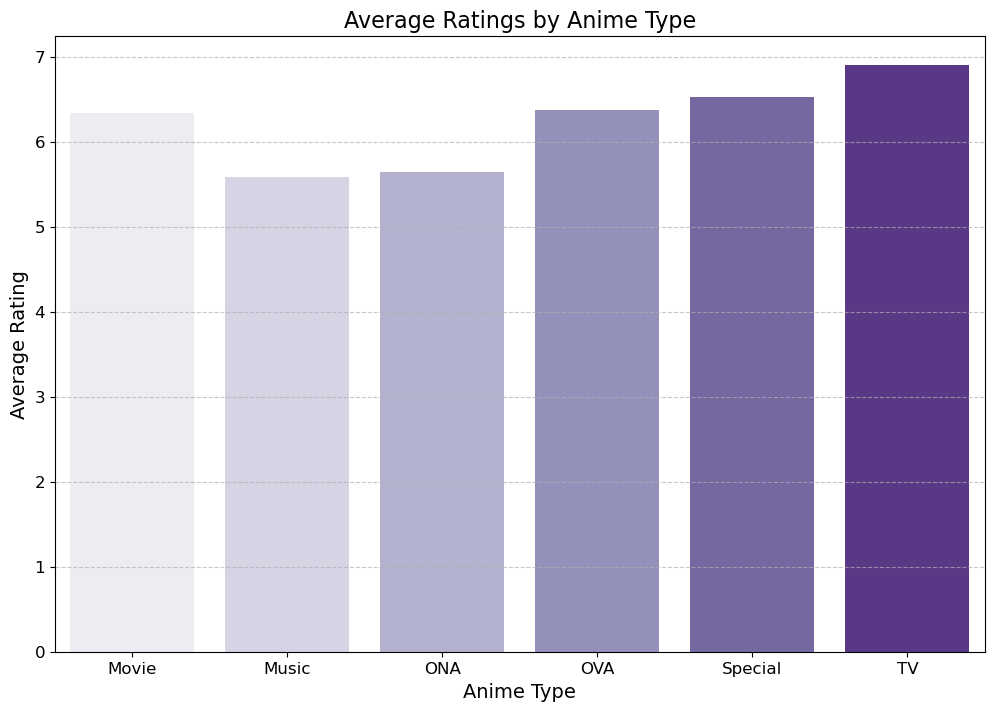

In [105]:
# Visualize average ratings by type
plt.figure(figsize=(12, 8))
sns.barplot(x=average_ratings_by_type.index, y=average_ratings_by_type.values, hue=average_ratings_by_type.index, palette='Purples', legend=False)
plt.title('Average Ratings by Anime Type', fontsize=16)
plt.xlabel('Anime Type', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



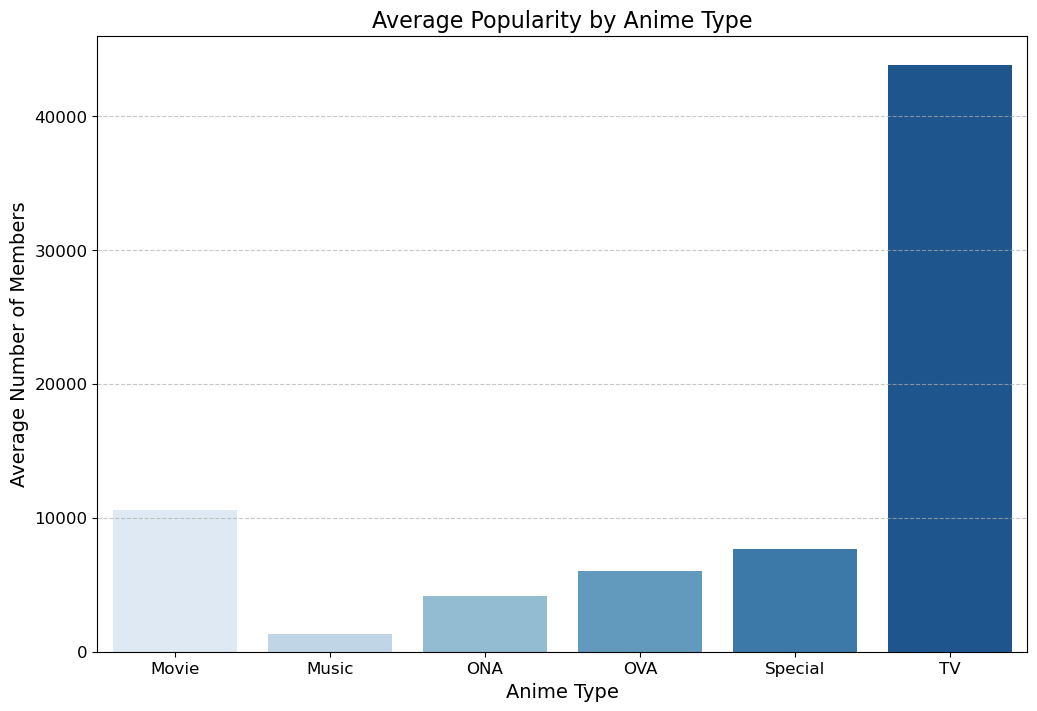

In [106]:
# Visualize average members by type
plt.figure(figsize=(12, 8))
sns.barplot(x=average_members_by_type.index, y=average_members_by_type.values, hue=average_members_by_type.index, palette='Blues', legend=False)
plt.title('Average Popularity by Anime Type', fontsize=16)
plt.xlabel('Anime Type', fontsize=14)
plt.ylabel('Average Number of Members', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1200x800 with 0 Axes>

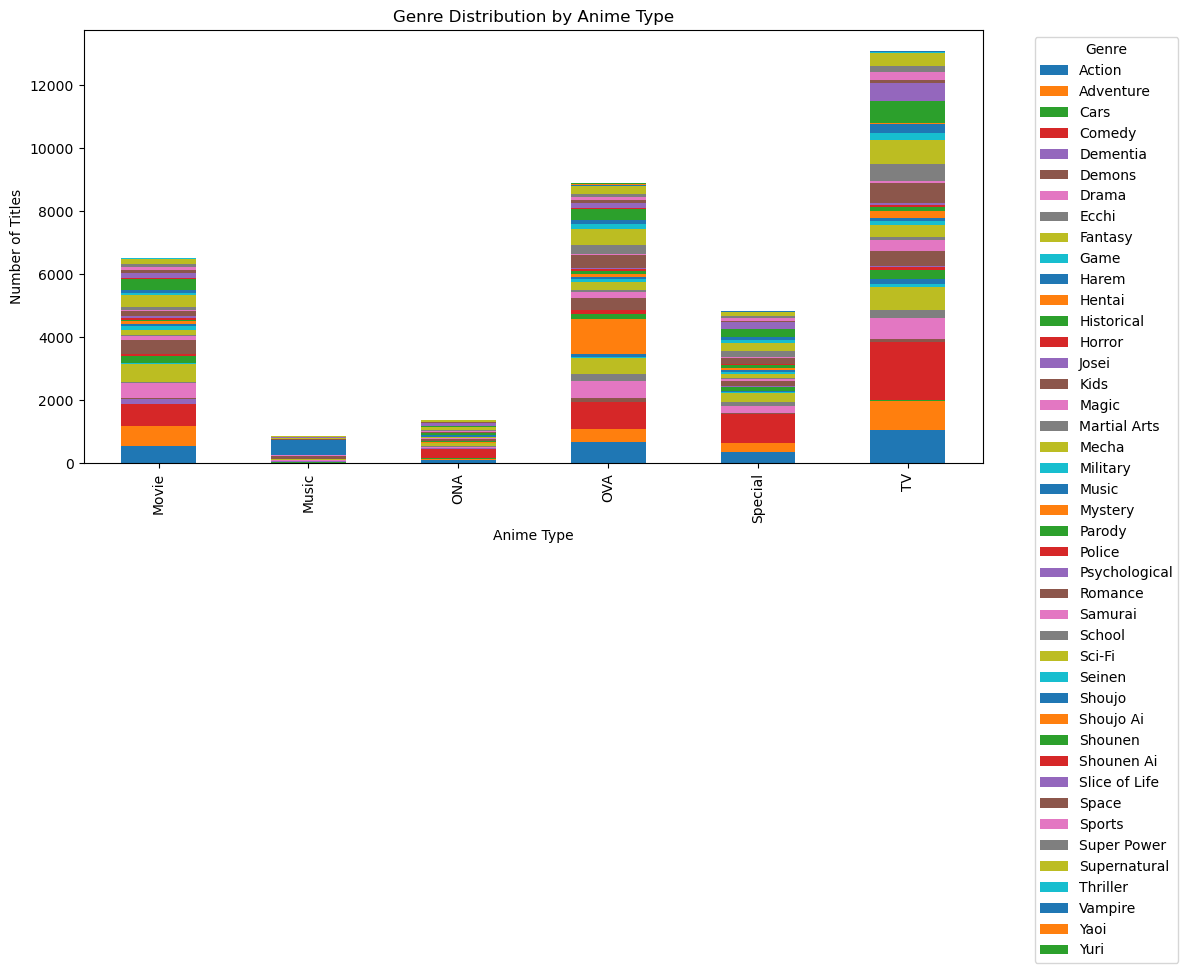

In [107]:
# Visualize genre distribution by type
plt.figure(figsize=(12, 8))
genre_distribution_by_type.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Genre Distribution by Anime Type')
plt.xlabel('Anime Type')
plt.ylabel('Number of Titles')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [108]:
# Count the occurrences of each genre by type
genre_counts_by_type = exploded_genre_df.groupby(['type', 'genre']).size().reset_index(name='count')

# Sort and get the top 5 genres for each type
top_5_genres_by_type = genre_counts_by_type.sort_values(['type', 'count'], ascending=[True, False]).groupby('type').head(5)

top_5_genres_by_type.head()

,type,genre,count
3,Movie,Comedy,678
1,Movie,Adventure,634
8,Movie,Fantasy,570
0,Movie,Action,546
6,Movie,Drama,473


In [109]:
# Display the top 5 genres for each type
for anime_type in top_5_genres_by_type['type'].unique():
    print(f"\nTop 5 genres for {anime_type}:")
    print(top_5_genres_by_type[top_5_genres_by_type['type'] == anime_type][['genre', 'count']])


Top 5 genres for Movie:
       genre  count
3     Comedy    678
1  Adventure    634
8    Fantasy    570
0     Action    546
6      Drama    473

Top 5 genres for Music:
      genre  count
56    Music    487
52     Kids     98
48  Fantasy     41
63   Sci-Fi     27
46    Drama     26

Top 5 genres for ONA:
             genre  count
75          Comedy    310
72          Action    112
105  Slice of Life     98
80         Fantasy     95
99          Sci-Fi     74

Top 5 genres for OVA:
      genre  count
125  Hentai   1104
117  Comedy    841
114  Action    673
120   Drama    543
142  Sci-Fi    517

Top 5 genres for Special:
         genre  count
160     Comedy    900
157     Action    356
158  Adventure    297
165    Fantasy    290
185     Sci-Fi    264

Top 5 genres for TV:
         genre  count
203     Comedy   1828
200     Action   1064
201  Adventure    917
227     Sci-Fi    757
208    Fantasy    732


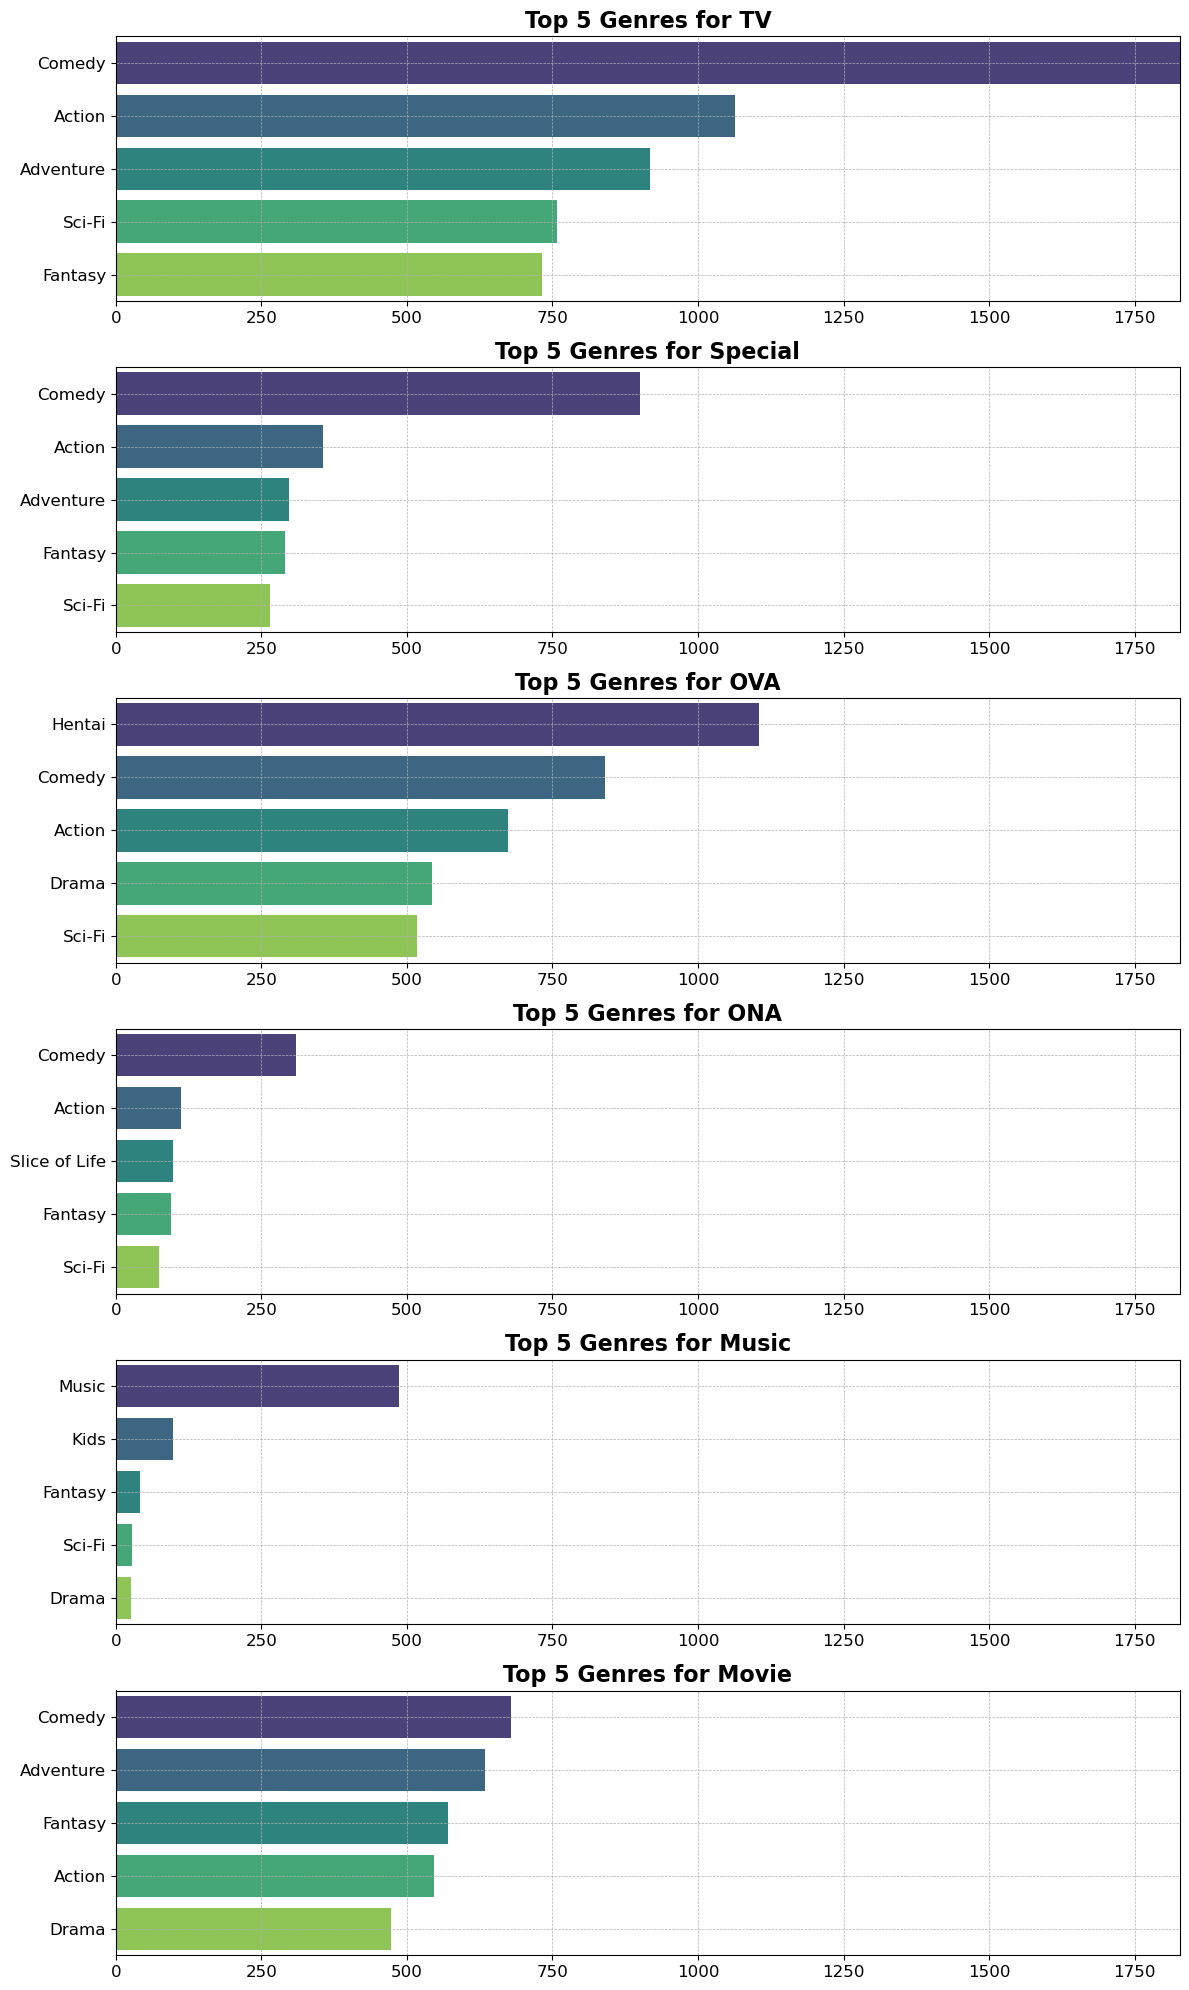

In [110]:
# Visualize the top 5 genres for each type in reverse
plt.figure(figsize=(12, 20))
max_count = top_5_genres_by_type['count'].max()
for i, anime_type in enumerate(reversed(top_5_genres_by_type['type'].unique()), start=1):
    plt.subplot(len(top_5_genres_by_type['type'].unique()), 1, i)
    sns.barplot(x='count', y='genre', hue='genre', data=top_5_genres_by_type[top_5_genres_by_type['type'] == anime_type], palette='viridis', legend=False)
    plt.title(f'Top 5 Genres for {anime_type}', fontsize=16, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks( fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(0, max_count)
    plt.tight_layout(pad=3.0)

plt.tight_layout()
plt.show()